In [1]:
import os, sys
sys.path.append(os.path.abspath('../src'))
from chemspace import Fingerprints, load_data, NMRVector, IRVector, ChemicalSpaceGraph

In [2]:
graph = ChemicalSpaceGraph.from_file('../cache.h5', '../cache-cohen.p')
len(graph.edges)

840456

In [3]:
import numpy as np
import pandas as pd

In [4]:
edges = pd.DataFrame([[a, b, graph.edges[(a, b)]] for a, b in graph.edges])

In [5]:
edges.describe()

,2
count,840456.000000
mean,0.036038
std,0.047018
min,-0.002443
25%,-0.000825
50%,0.025623
75%,0.057786
max,0.777699


In [7]:
for i in range(5):
    t = 0.05 + i / 10
    print(t, len(edges[edges[2] > t]))

0.05 246482
0.15000000000000002 24981
0.25 2774
0.35 456
0.45 54


In [8]:
from matplotlib import pyplot as plt
f = graph.fingerprints_df['Cn1ccc2oc(=O)cnc21']
x = np.arange(len(f))

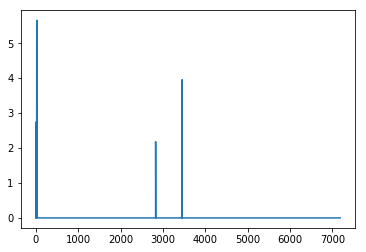

In [9]:
plt.plot(x, f)

In [10]:
from gephistreamer import graph as gephi_graph, streamer

In [16]:
gephi_nodes = [gephi_graph.Node(x) for x in graph.nodes]

In [23]:
def show(threshold, gephi_nodes):
    gephi_edges_ = [
        gephi_graph.Edge(x, y, directed=False, weight=graph.edges[(x, y)], label='%.4f' % graph.edges[(x, y)])
        for x, y in graph.edges
        if graph.edges[(x, y)] > threshold
    ]
    print(len(gephi_edges_))
    stream = streamer.Streamer(streamer.GephiWS(workspace=str(threshold)))
    stream.add_node(*gephi_nodes)
    stream.add_edge(*gephi_edges_)
    return gephi_edges_

In [24]:
show(0.25, gephi_nodes);

2774


In [25]:
max_coeffs = {}
for (x, y) in graph.edges:
    d = graph.edges[(x, y)]
    if max_coeffs.get(x, (0, -1))[0] < d:
        max_coeffs[x] = (d, y)
    if max_coeffs.get(y, (0, -1))[0] < d:
        max_coeffs[y] = (d, x)

In [29]:
maxs = pd.Series([x[0] for x in max_coeffs.values()])
maxs.describe()

count    1297.000000
mean        0.265232
std         0.102332
min         0.105431
25%         0.186807
50%         0.239411
75%         0.332921
max         0.777699
dtype: float64

In [28]:
len(max_coeffs)

1297

In [41]:
ms = [x for x in max_coeffs if np.abs(max_coeffs[x][0] - 0.777699) < 0.00001]
print([(x, max_coeffs[x]) for x in ms])

[('O=c1[nH]cc(-c2cc[nH]c2)o1', (0.7776986988071108, 'O=c1[nH]c(-c2cc[nH]c2)co1')), ('O=c1[nH]c(-c2cc[nH]c2)co1', (0.7776986988071108, 'O=c1[nH]cc(-c2cc[nH]c2)o1'))]


In [24]:
max_coeffs

2194
